# Linear Algebra

- We’ve learned four ways to solve Least Squares problem. Here, we will focus on Least Squares using SVD and QR decomposition.
- For questions a and b, please show the outputs of the code (the norms) and include a copy of Jupyter notebook (or similar kind), showing that you’ve solved the least squares.
- Here, we provide a starting code using Python. However, if you prefer to use other languages, you may use it, too (please fix a random seed so that we can verify the answer).


In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla


Let’s do a tall matrix with a null space

In [2]:
np.random.seed(40)
X = np.random.randn(6,4)
y  = np.random.randn(6)
X[3] = X[4] + X[5]
X[1] = X[5] + X[1]
X[2] = X[3] + X[1]
X[0] = X[3] + X[1]


## a. Least squares with QR decomposition

Let’s solve the least squares problem when matrix X has a null space using QR decomposition.


In [3]:
Q, R = la.qr(X)
R.round(3)


array([[ 2.908, -0.187, -3.714, -2.67 ],
       [ 0.   ,  0.911, -0.734, -0.837],
       [ 0.   ,  0.   , -0.666, -2.169],
       [ 0.   ,  0.   ,  0.   , -0.   ]])

In [4]:
beta_qr = np.zeros(X.shape[1])
beta_qr[3] = 0 
QTbnew = Q.T.dot(y)[:3,] - R[:3, 3] * beta_qr[3]
beta_qr[:3] = spla.solve_triangular(R[:3, :3], QTbnew, lower = False)


Let’s focus on the residual norm and the norm of `beta_qr`

In [5]:
R.dot(beta_qr) - Q.T.dot(y)[:4]


array([ 1.33226763e-15,  0.00000000e+00,  0.00000000e+00, -6.08537990e-01])

In [6]:
def show_residuals_and_norm(beta, X, y):
    print(la.norm(X.dot(beta) - y, 2))
    print(la.norm(beta, 2))

In [7]:
show_residuals_and_norm(beta_qr, X, y)

0.842345468623643
5.397708623031269


## b. Least squares with singular value decomposition (SVD)

Let’s solve the least squares problem when the *matrix X has a nullspace* using SVD.

Compute the SVD of *X*

In [8]:
U, sigma, VT = la.svd(X)

Work on a matrix $\Sigma$

In [9]:
Sigma = np.zeros(X.shape)
Sigma[:4, :4] = np.diag(sigma)


Check that we’ve factorized X:

In [10]:
(U.dot(Sigma).dot(VT) - X).round(3)


array([[-0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.]])

Let’s bring in in the pseudoinverse of $\Sigma$, i.e. $\Sigma^+$

In [11]:
Sigma_pinv = np.zeros(X.shape).T
Sigma_pinv[:3, :3] = np.diag(1/sigma[:3])
Sigma_pinv.round(3)


array([[0.174, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.583, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.098, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

Now compute the SVD-based solution for the least-squares problem: 

In [12]:
beta_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(y)

In [13]:
beta_svd

array([ 0.31572878,  0.25675319, -0.13985239,  1.04043051])

In [14]:
show_residuals_and_norm(beta_qr, X, y)

0.842345468623643
5.397708623031269


## c. Observed behavior

Please plot the beta from the QR decomposition and the beta from SVD. Please write a few notes on the observed behavior using QR decomposition and SVD for solving the least squares problem.


In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [16]:
def plot_betas(beta_svd, beta_qr):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(1, 1)
    fig_axs = [fig.add_subplot(sp) for sp in gs]
    ax = fig_axs[0]
    beta_min = np.min([beta_qr, beta_svd])
    beta_max = np.max([beta_qr, beta_svd])    
    ax.plot(
        np.linspace(beta_min - 0.2, beta_max + 0.2, 10), 
        np.linspace(beta_min - 0.2, beta_max + 0.2, 10), 
        '--', color='gray'
    )
    
    ax.plot(
        np.zeros(10), 
        np.linspace(beta_min - 0.2, beta_max + 0.2, 10), 
        '--', color='gray'
    )
    ax.plot(
        np.linspace(beta_min - 0.2, beta_max + 0.2, 10),         
        np.zeros(10),
        '--', color='gray'
    )
    ax.scatter(beta_qr, beta_svd, color='red')
    ax.set_title('Comparison of beta estimates from two methods', size=14)
    ax.set_xlabel('Beta from QR (beta_qr)', size=14)
    ax.set_ylabel('Beta from SVD (beta_svd)', size=14)
    for i in (range(len(beta_qr))):
        ax.annotate(f' {i + 1}', [beta_qr[i], beta_svd[i]], size=16)
    gs.tight_layout(fig, rect=[0, 0, 1, 1]) 
    return(fig)


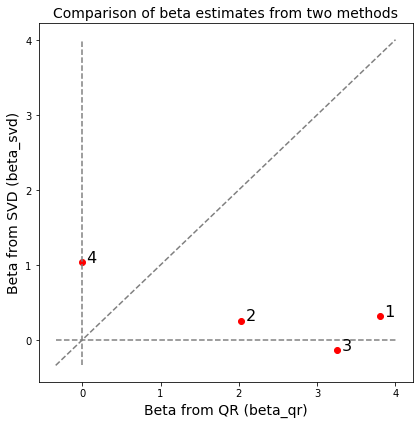

In [17]:
f_beta = plot_betas(beta_svd, beta_qr)

In [18]:
f_beta.savefig('BIODS215-2020_Problem_set_1_answer_Q2c.png')

## d. “Better behaved” matrices

In [19]:
np.random.seed(40)
X_better = np.random.randn(6,6)
y_better  = np.random.randn(6)


### Solving Beta with QR

In [20]:
Q_better, R_better = la.qr(X_better)
R_better.round(3)


array([[ 2.676,  0.9  ,  1.131,  0.527, -0.2  ,  0.892],
       [ 0.   ,  1.459, -0.646, -0.222, -0.092, -0.891],
       [ 0.   ,  0.   ,  1.876, -0.306,  0.488,  0.394],
       [ 0.   ,  0.   ,  0.   ,  1.368, -0.257, -0.843],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  2.634, -0.678],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -1.075]])

In [21]:
beta_qr_better = spla.solve_triangular(R_better, Q_better.T.dot(y_better), lower = False)


In [22]:
show_residuals_and_norm(beta_qr_better, X_better, y_better)

5.297244499711338e-16
1.9729759658826995


### Solving Beta with SVD

In [23]:
U_better, sigma_better, VT_better = la.svd(X_better)
(U_better.dot(np.diag(sigma_better)).dot(VT_better) - X_better).round(3)


array([[ 0., -0., -0.,  0., -0., -0.],
       [-0., -0.,  0.,  0.,  0.,  0.],
       [ 0., -0.,  0., -0., -0.,  0.],
       [ 0.,  0., -0.,  0., -0., -0.],
       [ 0.,  0., -0., -0.,  0., -0.],
       [ 0.,  0., -0.,  0., -0.,  0.]])

In [24]:
Sigma_pinv_better = np.diag(1/sigma_better)
Sigma_pinv_better.round(3)


array([[0.295, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.361, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.442, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.633, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.742, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.59 ]])

In [25]:
beta_svd_better = VT_better.T.dot(Sigma_pinv_better).dot(U_better.T).dot(y_better)


In [26]:
show_residuals_and_norm(beta_svd_better, X_better, y_better)

1.1518563880486e-15
1.9729759658826995


### Comparison of the two methods

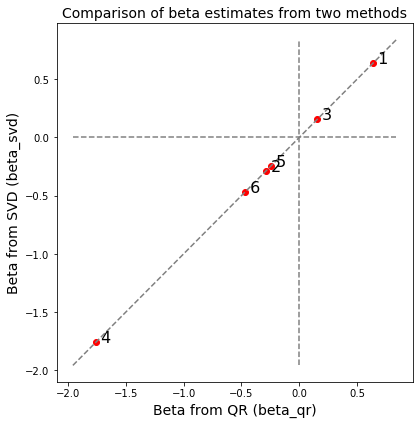

In [27]:
f_beta_better = plot_betas(beta_svd_better, beta_qr_better)

In [28]:
f_beta_better.savefig('BIODS215-2020_Problem_set_1_answer_Q2d.png')

## e. Solving a linear system

In [29]:
beta_normal = la.inv(X.T.dot(X)).dot(X.T).dot(y)


In [30]:
show_residuals_and_norm(beta_normal, X, y)

1.0286714865770377
1.4825615460039647


In [31]:
beta_normal

array([ 0.48283736,  0.84320332, -0.16533215,  1.10748827])

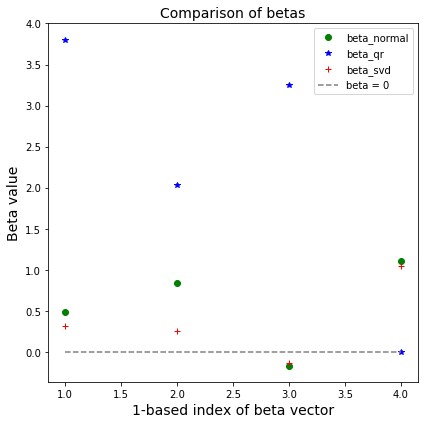

In [32]:
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 1)
fig_axs = [fig.add_subplot(sp) for sp in gs]
ax = fig_axs[0]
beta_min = np.min([beta_qr, beta_svd, beta_normal])
beta_max = np.max([beta_qr, beta_svd, beta_normal])
xaxis = np.arange(4) + 1
ax.plot(xaxis, beta_normal, 'go', label='beta_normal')
ax.plot(xaxis, beta_qr,     'b*', label='beta_qr')
ax.plot(xaxis, beta_svd,    'r+', label='beta_svd')
ax.plot(xaxis, np.zeros(4), '--', color='gray', label='beta = 0')
ax.legend()
ax.set_title('Comparison of betas', size=14)
ax.set_xlabel('1-based index of beta vector', size=14)
ax.set_ylabel('Beta value', size=14)
gs.tight_layout(fig, rect=[0, 0, 1, 1]) 
# return(fig)


In [33]:
fig.savefig('BIODS215-2020_Problem_set_1_answer_Q2e.png')